![logo.jpg](logo.jpg) 
### Report photométrique de la supernova ***SN 2019ein***<br>

###### Dominique Touzan.
###### 1. https://sites.google.com/view/astronomie-ut1/accueil
###### 2. dtouzan@gmail.com

###### **Édition**   1.0, révision  16/06/2019

##### **Résumé**  
###### ***Mots-clés*** : CCD - Supernova - Photométrie

### Positions des prises de vue de l'observatoire UT1 sur une projection Aitoff.
##### Les marqueurs indiquent les positions des différentes images prise à l'observatoire. Un fichier au format MAST **(mast.stsci.edu)** est lu et mis en forme pour reporter les observations indiquées en bleu, un autre fichier lui reporte différentes constellations.

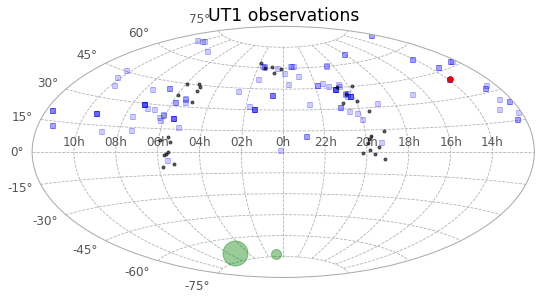

In [38]:
# Date    :10/06/2019
# Autheur :Dominique Touzan, dtouzan@gmail.com
# Importation des modules
#           numpy       :
#           matplotlib  : Mathématique,dessin
#           astropy     : Astronomie
#
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord
import numpy as np
import astropy.table as vstack
from astropy.io import ascii
from astropy.visualization import astropy_mpl_style

# Configuration du style de dessin
plt.style.use(astropy_mpl_style)

# Importation des fichiers de données
#           UT1_MAST_CATALOG.csv   : Catalogue UT1 Mast
#           data_stars.csv         : Catalogue d'étoiles
#           data_SMCLMC            : Catalogue SMC LMC
data = ascii.read("UT1_MAST_CATALOG.csv",data_start=3,format='csv')
data_stars= ascii.read("data_stars.csv",data_start=1,format='csv')
data_SMCLMC= ascii.read("data_SMCLMC.csv",data_start=1,format='csv')

# Objet rechrercher dans le catalogue UT1 Mast
data_search='sn2019ein'

# Configuration du dessin
fig = plt.figure(figsize=(9,5))
# Configuration de la projecion cartographique du titre et grille 
ax = fig.add_subplot(111,projection='aitoff')
plt.grid(True,axis='both',linestyle='--')
plt.title('UT1 observations')


# Lecture des données du catalogue UT1 Mast    
for ligne in data:
    if ligne[7]==data_search:
        marker_color='red'
        marker_alpha=0.8
        marker_label=''
        marker_type='o'
    else:
        marker_color='blue'
        marker_type='s'
        marker_alpha=0.2
        marker_label=''
    # RA et DEC en degré    
    ra=ligne[10]*u.deg
    dec=ligne[11]*u.deg
    # Configuration de la position en ICRS
    c = SkyCoord(ra, dec, frame='icrs')
    # RA et DEC en radian et repositionnement
    ra_rad = -c.ra.wrap_at(180 * u.deg).radian
    dec_rad = c.dec.radian
    # Affichage sur la projection
    plt.plot(ra_rad, dec_rad, marker=marker_type, color=marker_color, markersize=5, alpha=marker_alpha)

# Dessin des constellations
for ligne in data_stars:
    # RA et DEC en degré 
    ra=ligne[0]*u.deg
    dec=ligne[1]*u.deg
    # Configuration de la position en ICRS
    c = SkyCoord(ra, dec, frame='icrs')
     # RA et DEC en radian et repositionnement
    ra_rad = -c.ra.wrap_at(180 * u.deg).radian
    dec_rad = c.dec.radian
    # Affichage sur la projection
    plt.plot(ra_rad, dec_rad, 'o', color='black', markersize=3, alpha=0.6)

# Dessin des SMC LMC
for ligne in data_SMCLMC:
    name=ligne[2]
    # RA et DEC en degré 
    ra=ligne[0]*u.deg
    dec=ligne[1]*u.deg
    # Configuration de la position en ICRS
    c = SkyCoord(ra, dec, frame='icrs')
     # RA et DEC en radian et repositionnement
    ra_rad = -c.ra.wrap_at(180 * u.deg).radian
    dec_rad = c.dec.radian
    # Affichage sur la projection
    if name == "smc":
        marker_size=10
    else:
        marker_size=25
    plt.plot(ra_rad, dec_rad, 'o', color='green', markersize=marker_size, alpha=0.4)
    
# Modification des labels en heure
ax.set_xticklabels(['10h','08h','06h','04h','02h','0h','22h','20h','18h','16h','14h'])
# Affichage
plt.show()

###### ***Fig. 1.*** La marque rouge indique la position de la supernova 

### Hauteurs de la supernova à l'observatoire UT1
##### Les deux dates d'observations sont le 13/05/2019 et 31/05/2019, Les hauteurs ne SN 2019ein vers 22h UT sont proche du zénith donc accéssible pour le site, cependant pour la soirée du 13 mai l'illumination de la lune (70% de surface éclairée) se fait ressentir sur les images.

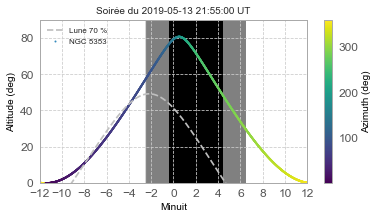

In [8]:
# Date    :31/05/2019
# Importation des modules
#           numpy       :
#           matplotlib  : Mathématique,dessin
#           astropy     : Astronomie
#           datetime    : Date, Temps
#           astroplan   : Astronomie 
#           fits        : Astronomie
#
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from astropy.visualization import astropy_mpl_style
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.coordinates import get_sun, get_moon
import astroplan
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
#from astroplan import download_IERS_A

# Configuration des éphémérides
#download_IERS_A()

# Configuration du style de dessin
plt.style.use(astropy_mpl_style)

# Nom de l'astre rechercher au CDS
name_astre='NGC 5353'

# Date de l'observation
aaaa=2019
mm=5
jj=13
hr=23
mn=55
sec=0

# soirée àde l'observation à minnuit
midnight_aaaa=2019
midnight_mm=5
midnight_jj=14

# Valeur des coordonés de l'astre
coord_astre = SkyCoord.from_name(name_astre)

# Coordonnés de l'observatoire UT1
coord_ut1=EarthLocation(lat=49.5888*u.deg,lon=-0.35*u.deg,height=100*u.m) 

# Décalage horaire
utcoffset = 2*u.hour

# initialisation de la date d'observation
# module astropy
date_observation = Time(datetime(aaaa,mm,jj,hr,mn,sec),scale='utc') - utcoffset
midnight = Time(datetime(midnight_aaaa,midnight_mm,midnight_jj,0,0,0),scale='utc') - utcoffset

# Azimuth et hauteur de l'astre
# module astropy
astre_altaz = coord_astre.transform_to(AltAz(obstime=date_observation,location=coord_ut1))

# Azimuth et hauteur du Soleil
# module astropy
delta_midnight = np.linspace(-12, 12, 2000)*u.hour
times_dates = midnight + delta_midnight
frame_dates = AltAz(obstime=times_dates, location=coord_ut1)
sunaltazs_dates = get_sun(times_dates).transform_to(frame_dates)

# Azimuth, hauteur et illumination de la Lune
# module astropy
moon_dates = get_moon(times_dates)
moonaltazs_dates = moon_dates.transform_to(frame_dates)
k=int(astroplan.moon_illumination(date_observation)*100)

# Azimuth et hauteur de l'astre
# module astropy
astrealtazs_dates = astre_altaz.transform_to(frame_dates)

# Dessin 
#
# taille du canevas
plt.figure(figsize=(6,3))
plt.grid(True,axis='both',linestyle='--')
# Tracé de la Lune, couleur et label avec % d'illumination
plt.plot(delta_midnight, moonaltazs_dates.alt, color=[0.75]*3, ls='--', label='Lune '+str(k)+' %')
# Tracé de l'astre, label et couleur
plt.scatter(delta_midnight, astrealtazs_dates.alt,c=astrealtazs_dates.az, label=name_astre, lw=1, s=1,cmap='viridis') 
# tracé de la nuit (pénombre)
plt.fill_between(delta_midnight.to('hr').value, 0, 90,sunaltazs_dates.alt < -0*u.deg, color='0.5', zorder=0)
# Tracé de la nuit total
plt.fill_between(delta_midnight.to('hr').value, 0, 90,sunaltazs_dates.alt < -15*u.deg, color='k', zorder=0)

# Trace du titre
plt.title("Soirée du "+str(date_observation)+" UT", fontsize=10)
# Tracé du label "Azimuh"
plt.colorbar().set_label('Azimuth (deg)', fontsize=10)
# tracé des légendes
plt.legend(loc='upper left', fontsize=8)
# Tracé de la grille Horaire
plt.xlim(-12, 12)
plt.xticks(np.arange(13)*2 -12)
# Tracé de la grille d'altitude
plt.ylim(0, 90)
# Tracé du label "Minuit" sur axe X
plt.xlabel('Minuit', fontsize=10)
# Tracé du label "Altitude"
plt.ylabel('Altitude (deg)', fontsize=10)
# Affichage
plt.show()

###### ***Fig. 2.*** Hauteur pour le 13 mai 2019 

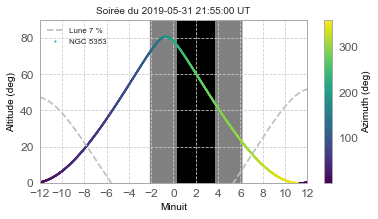

In [7]:
# Date    :31/05/2019
# Importation des modules
#           numpy       :
#           matplotlib  : Mathématique,dessin
#           astropy     : Astronomie
#           datetime    : Date, Temps
#           astroplan   : Astronomie 
#           fits        : Astronomie
#
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from astropy.visualization import astropy_mpl_style
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.coordinates import get_sun, get_moon
import astroplan
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
#from astroplan import download_IERS_A

# Configuration des éphémérides
#download_IERS_A()

# Configuration du style de dessin
plt.style.use(astropy_mpl_style)

# Nom de l'astre rechercher au CDS
name_astre='NGC 5353'

# Date de l'observation
aaaa=2019
mm=5
jj=31
hr=23
mn=55
sec=0

# soirée àde l'observation à minnuit
midnight_aaaa=2019
midnight_mm=6
midnight_jj=1

# Valeur des coordonés de l'astre
coord_astre = SkyCoord.from_name(name_astre)

# Coordonnés de l'observatoire UT1
coord_ut1=EarthLocation(lat=49.5888*u.deg,lon=-0.35*u.deg,height=100*u.m) 

# Décalage horaire
utcoffset = 2*u.hour

# initialisation de la date d'observation
# module astropy
date_observation = Time(datetime(aaaa,mm,jj,hr,mn,sec),scale='utc') - utcoffset
midnight = Time(datetime(midnight_aaaa,midnight_mm,midnight_jj,0,0,0),scale='utc') - utcoffset

# Azimuth et hauteur de l'astre
# module astropy
astre_altaz = coord_astre.transform_to(AltAz(obstime=date_observation,location=coord_ut1))

# Azimuth et hauteur du Soleil
# module astropy
delta_midnight = np.linspace(-12, 12, 2000)*u.hour
times_dates = midnight + delta_midnight
frame_dates = AltAz(obstime=times_dates, location=coord_ut1)
sunaltazs_dates = get_sun(times_dates).transform_to(frame_dates)

# Azimuth, hauteur et illumination de la Lune
# module astropy
moon_dates = get_moon(times_dates)
moonaltazs_dates = moon_dates.transform_to(frame_dates)
k=int(astroplan.moon_illumination(date_observation)*100)

# Azimuth et hauteur de l'astre
# module astropy
astrealtazs_dates = astre_altaz.transform_to(frame_dates)

# Dessin 
#
# taille du canevas
plt.figure(figsize=(6,3))
plt.grid(True,axis='both',linestyle='--')
# Tracé de la Lune, couleur et label avec % d'illumination
plt.plot(delta_midnight, moonaltazs_dates.alt, color=[0.75]*3, ls='--', label='Lune '+str(k)+' %')
# Tracé de l'astre, label et couleur
plt.scatter(delta_midnight, astrealtazs_dates.alt,c=astrealtazs_dates.az, label=name_astre, lw=1, s=1,cmap='viridis') 
# tracé de la nuit (pénombre)
plt.fill_between(delta_midnight.to('hr').value, 0, 90,sunaltazs_dates.alt < -0*u.deg, color='0.5', zorder=0)
# Tracé de la nuit total
plt.fill_between(delta_midnight.to('hr').value, 0, 90,sunaltazs_dates.alt < -15*u.deg, color='k', zorder=0)

# Trace du titre
plt.title("Soirée du "+str(date_observation)+" UT", fontsize=10)
# Tracé du label "Azimuh"
plt.colorbar().set_label('Azimuth (deg)', fontsize=10)
# tracé des légendes
plt.legend(loc='upper left', fontsize=8)
# Tracé de la grille Horaire
plt.xlim(-12, 12)
plt.xticks(np.arange(13)*2 -12)
# Tracé de la grille d'altitude
plt.ylim(0, 90)
# Tracé du label "Minuit" sur axe X
plt.xlabel('Minuit', fontsize=10)
# Tracé du label "Altitude"
plt.ylabel('Altitude (deg)', fontsize=10)
# Affichage
plt.show()

###### ***Fig. 3.*** Hauteur pour le 31 mai 2019 

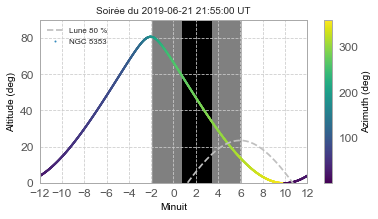

In [6]:
# Date    :31/05/2019
# Importation des modules
#           numpy       :
#           matplotlib  : Mathématique,dessin
#           astropy     : Astronomie
#           datetime    : Date, Temps
#           astroplan   : Astronomie 
#           fits        : Astronomie
#
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from astropy.visualization import astropy_mpl_style
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.coordinates import get_sun, get_moon
import astroplan
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
#from astroplan import download_IERS_A

# Configuration des éphémérides
#download_IERS_A()

# Configuration du style de dessin
plt.style.use(astropy_mpl_style)

# Nom de l'astre rechercher au CDS
name_astre='NGC 5353'

# Date de l'observation
aaaa=2019
mm=6
jj=21
hr=23
mn=55
sec=0

# soirée àde l'observation à minnuit
midnight_aaaa=2019
midnight_mm=6
midnight_jj=22

# Valeur des coordonés de l'astre
coord_astre = SkyCoord.from_name(name_astre)

# Coordonnés de l'observatoire UT1
coord_ut1=EarthLocation(lat=49.5888*u.deg,lon=-0.35*u.deg,height=100*u.m) 

# Décalage horaire
utcoffset = 2*u.hour

# initialisation de la date d'observation
# module astropy
date_observation = Time(datetime(aaaa,mm,jj,hr,mn,sec),scale='utc') - utcoffset
midnight = Time(datetime(midnight_aaaa,midnight_mm,midnight_jj,0,0,0),scale='utc') - utcoffset

# Azimuth et hauteur de l'astre
# module astropy
astre_altaz = coord_astre.transform_to(AltAz(obstime=date_observation,location=coord_ut1))

# Azimuth et hauteur du Soleil
# module astropy
delta_midnight = np.linspace(-12, 12, 2000)*u.hour
times_dates = midnight + delta_midnight
frame_dates = AltAz(obstime=times_dates, location=coord_ut1)
sunaltazs_dates = get_sun(times_dates).transform_to(frame_dates)

# Azimuth, hauteur et illumination de la Lune
# module astropy
moon_dates = get_moon(times_dates)
moonaltazs_dates = moon_dates.transform_to(frame_dates)
k=int(astroplan.moon_illumination(date_observation)*100)

# Azimuth et hauteur de l'astre
# module astropy
astrealtazs_dates = astre_altaz.transform_to(frame_dates)

# Dessin 
#
# taille du canevas
plt.figure(figsize=(6,3))
plt.grid(True,axis='both',linestyle='--')
# Tracé de la Lune, couleur et label avec % d'illumination
plt.plot(delta_midnight, moonaltazs_dates.alt, color=[0.75]*3, ls='--', label='Lune '+str(k)+' %')
# Tracé de l'astre, label et couleur
plt.scatter(delta_midnight, astrealtazs_dates.alt,c=astrealtazs_dates.az, label=name_astre, lw=1, s=1,cmap='viridis') 
# tracé de la nuit (pénombre)
plt.fill_between(delta_midnight.to('hr').value, 0, 90,sunaltazs_dates.alt < -0*u.deg, color='0.5', zorder=0)
# Tracé de la nuit total
plt.fill_between(delta_midnight.to('hr').value, 0, 90,sunaltazs_dates.alt < -15*u.deg, color='k', zorder=0)

# Trace du titre
plt.title("Soirée du "+str(date_observation)+" UT", fontsize=10)
# Tracé du label "Azimuh"
plt.colorbar().set_label('Azimuth (deg)', fontsize=10)
# tracé des légendes
plt.legend(loc='upper left', fontsize=8)
# Tracé de la grille Horaire
plt.xlim(-12, 12)
plt.xticks(np.arange(13)*2 -12)
# Tracé de la grille d'altitude
plt.ylim(0, 90)
# Tracé du label "Minuit" sur axe X
plt.xlabel('Minuit', fontsize=10)
# Tracé du label "Altitude"
plt.ylabel('Altitude (deg)', fontsize=10)
# Affichage
plt.show()

###### ***Fig. 4.*** Hauteur pour le 21 juin 2019 

#### Repérage de la supernova proche de la Galaxie NGC 5353
##### Pour indiquer le repérage les images des deux soirées on d'abord été calibrées avec le logiciel **Iris** pour avoir deux images  médian" (médian de 17 images de 300 sec) puis avec le logiciel **Aladin Sky Atlas** une calibration astrométrique est appliquée pour indiquer les coordonées **WCS**.

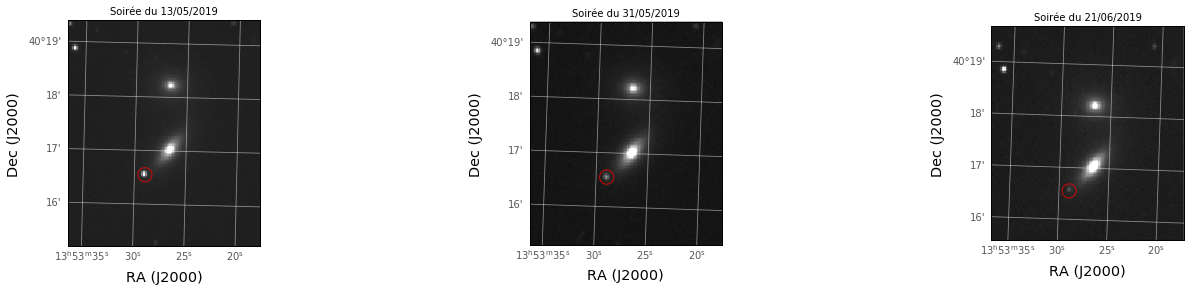

In [54]:
import matplotlib.pyplot as plt
import numpy
import aplpy
from astropy.io import ascii

sn2019ein_ra=208.3707
sn2019ein_dec=+40.27580

fig = plt.figure(figsize=(20,18))
f1=aplpy.FITSFigure('000115-20190513211556.fits',figure=fig, subplot=(1,5,1))
f1.add_grid()
f1.tick_labels.set_font(size='small')
f1.show_markers(sn2019ein_ra, sn2019ein_dec, edgecolor='red', facecolor='none', marker='o', s=200, alpha=0.8)
f1.show_grayscale(vmin=800, vmax=6000)
plt.title('Soirée du 13/05/2019',fontsize=10)

f2 = aplpy.FITSFigure('000120-20190531215057.fits', figure=fig, subplot=(1,5,3))
f2.add_grid()
f2.tick_labels.set_font(size='small')
f2.show_markers(sn2019ein_ra, sn2019ein_dec, edgecolor='red', facecolor='none', marker='o', s=200, alpha=0.8)
f2.show_grayscale(vmin=200, vmax=3000)
plt.title('Soirée du 31/05/2019',fontsize=10)

f3 = aplpy.FITSFigure('000121-20190621232500.fits', figure=fig, subplot=(1,5,5))
f3.add_grid()
f3.tick_labels.set_font(size='small')
f3.show_markers(sn2019ein_ra, sn2019ein_dec, edgecolor='red', facecolor='none', marker='o', s=200, alpha=0.8)
f3.show_grayscale(vmin=200, vmax=3500)
plt.title('Soirée du 21/06/2019',fontsize=10)

fig.canvas.draw()

###### ***Fig. 5.*** Repérage de sn 2019ein avec la galaxie NGC 5353, les magnitudes sont de 14.03, 14.70 et 16.05

#### Recherche de la magnitude de sn 2019ein avec la formule de l'**AAVSO**
##### Lecture du fichier sn2019ein_UT1.csv qui contient les variables suivante sur la 2ème ligne puis applique la formule ***mag1 - mag2 = -2,5 log10 (flux1 / flux2)***. 
##### - ***JD***        : Jour julien de la mesure
##### - ***Vadu***      : Mesure de l'intensité de la variable
##### - ***Cadu***      : Mesure de l'intensité de la constante

##### La valeur *Vmag* de la constante a été prise du catalogue ***UCAC4***.

##### Lecture du fichier sn2019ein_AAVSO.csv qui contient toutes les mesures téléchargées sur le site de l'AAVSO et affichage des deux courbes

##### **Conclusion** : Une perte évidente de luminosité d'environ 0,8 magnitude entre le 13/05/219 et le 31/05/2019 et de 1,30 magnitude entre le 31/05/2019 et le 21/06/2019 qui se voit très bien sur les images précédentes. La courbe avec le filtre **CLS-CCD** varie peu avec les mesures "V" de l'AAVSO . La 4ème mesure est réalisée avec un filtre **G Typ 2c** et s'approche très près des mesures.

     JD      Magnitude Uncertainty HQuncertainty ... Credit  Vadu  Cadu
------------ --------- ----------- ------------- ... ------ ----- -----
2458617.4583        --          --            -- ...     -- 54147 33145
2458635.4583        --          --            -- ...     -- 21951 25021
2458656.4263        --          --            -- ...     --  8816 34638
2458656.4756        --          --            -- ...     --  5244 21151
2458663.4437        --          --            -- ...     --  4179 19978
    MJD      Mv
---------- -----
58616.9583 14.04
58634.9583 14.71
58655.9263 16.06
58655.9756 16.08
58662.9437 16.27


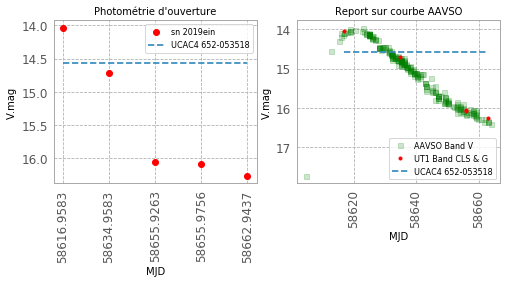

In [14]:
from astropy.io import ascii
from astropy.visualization import astropy_mpl_style
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time

plt.style.use(astropy_mpl_style)

# Calcul de la magnitude

data = ascii.read("sn2019ein_UT1.csv",data_start=1,format='csv')

print(data)

Vmag=[]
Cmag=[]
mjd=[]
print('    MJD      Mv')
print('---------- -----')

for line in data:
    name_constante = line[7]
    filter_type = line[4]
    Vadu = float(line[24])
    Cadu = float(line[25])
    Cmag_UCAC4 = float(line[14])
    Cmag.append(Cmag_UCAC4)
    t=Time(float(line[0]),format='jd')
    mjd.append(round(t.mjd,4))
    # mag1 - mag2 = -2,5 log10 (flux1 / flux2) 
    Vmag_calc = -2.5*(np.log10(Vadu/Cadu))+Cmag_UCAC4
    Vmag.append(Vmag_calc)
    print(round(t.mjd,4),round(Vmag_calc,2))
    

plt.figure(figsize=(8,3))
plt.subplot(1, 2, 1)
plt.gca().invert_yaxis()
plt.grid(True,axis='both',linestyle='--')
plt.plot(np.arange(len(data)),Vmag,'o', color='red', label='sn 2019ein')
plt.plot(np.arange(len(data)),Cmag, "--", label=name_constante)
plt.legend(loc='upper right', fontsize=8)
plt.xlabel('MJD',fontsize=10)
plt.ylabel('V.mag',fontsize=10)
plt.title("Photométrie d'ouverture",fontsize=10)
plt.xticks(np.arange(len(data)),mjd,rotation=90)


# AAVSO courbe

name_AAVSO="AAVSO"
name_UT1="UT1"
band="V"
band_UT1="CLS"

x_AAVSO=[]
y_AAVSO=[]

data_AAVSO = ascii.read("sn2019ein_AAVSO.csv",data_start=1,format='csv')

for line in data_AAVSO:
    if line[4] == band:
        #x_AAVSO.append(float(line[0]))
        t=Time(float(line[0]),format='jd')
        x_AAVSO.append(round(t.mjd,4))
        y_AAVSO.append(float(line[1]))

plt.subplot(1, 2, 2)
plt.gca().invert_yaxis()
plt.grid(True,axis='both',linestyle='--')
plt.plot(x_AAVSO,y_AAVSO,'s', color='green',markersize=5, alpha=0.2,label=name_AAVSO+" Band "+band )
plt.plot(mjd,Vmag,'o', color='red',markersize=3, alpha=1,label=name_UT1+" Band "+band_UT1+" & G")
plt.plot(mjd,Cmag, ls='--', label=name_constante)
plt.xlabel('MJD',fontsize=10)
plt.xticks(rotation=90)
plt.ylabel('V.mag',fontsize=10)
plt.legend(loc='lower right', fontsize=8)
plt.title("Report sur courbe AAVSO",fontsize=10)
plt.show()

###### ***Fig. 6.*** Calculs et étalonages des mesures reportées sur la courbe de l'AAVSO

#### NGC 5350 (Mrk 1485) & l'amas de galaxie.

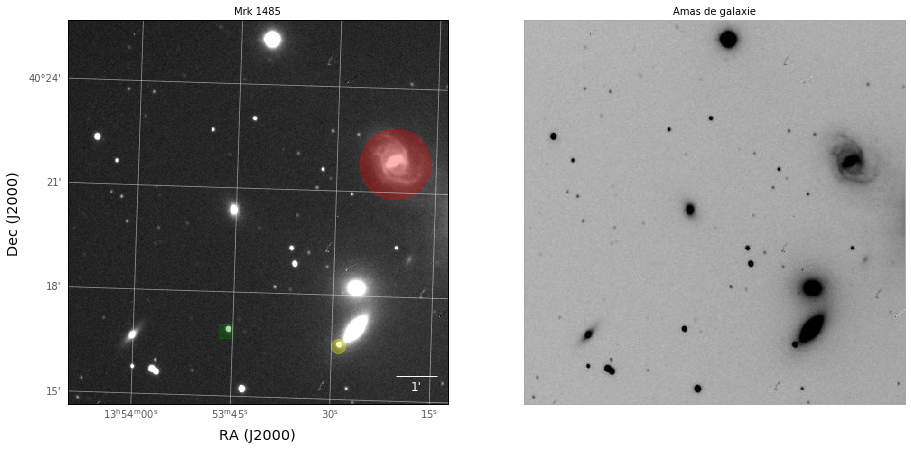

In [55]:
import matplotlib.pyplot as plt
import numpy
import aplpy
import matplotlib.image as mpimg
from astropy.visualization import astropy_mpl_style

plt.style.use(astropy_mpl_style)

ngc5350_ra=208.33854
ngc5350_dec=+40.36394
UCAC4_652_053518_ra=208.4413992
UCAC4_652_053518_dec=+40.2814253

fig = plt.figure(figsize=(15,12))
f1=aplpy.FITSFigure('mrk1485-201905-4s-59x300-f1000.fits',figure=fig, subplot=(1,2,1))
f1.add_grid()
f1.tick_labels.set_font(size='small')
f1.show_grayscale(vmin=900, vmax=1300)
f1.add_scalebar(0.02, "1'", color='white')
f1.show_markers(ngc5350_ra, ngc5350_dec, edgecolor='red',facecolor='red', marker='o', s=5000, alpha=0.3)
f1.show_markers(UCAC4_652_053518_ra, UCAC4_652_053518_dec, edgecolor='green',facecolor='green', marker='s', s=200, alpha=0.3)
f1.show_markers(sn2019ein_ra, sn2019ein_dec, edgecolor='yellow', facecolor='yellow', marker='o', s=200, alpha=0.3)
plt.title('Mrk 1485',fontsize=10)

plt.subplot(1,2,2)
im = mpimg.imread( 'mrk1485-201905-4s-59x300-f1000.jpg')
plt.grid()
plt.xticks([], [])
plt.yticks([], [])
plt.imshow(im)

plt.title('Amas de galaxie',fontsize=10)
fig.canvas.draw()

###### ***Fig. 7.*** Champ de l'amas de galaxie contenant NGC 5350 (Galaxie de Markarian 1485, marque rouge). Etoile UCAC4 652-053518 d'étalonage marque  verte. SN 2019ein marque jaune. Sur l'image de droite une amélioration cosmétique a été effectuée pour supprimer les points chauds résultant de l'additions des cinquante neuf images.